In [1]:
import os
# set wd

#Set your own data files path here
#path = "d:\cyk\gatech\CSE6242\ProjectCSE6242\ProjectUKdata"
path = "."
os.chdir(path)

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

### Import all data

In [3]:
#Random Forest

In [4]:
pima = pd.read_csv("alldatapoints_w_weather.csv")

In [5]:
pima.head()

,Unnamed: 0,Longitude,Latitude,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,Year,Date,...,precipProbability,precipType,pressure,summary,temperature,uvIndex,visibility,windBearing,windGust,windSpeed
0,0,-0.185496,51.483253,5,12,3,308,30,2012,19/1/2012,...,0.0,none,1022.61,Mostly Cloudy,52.72,0,5.70,247,7.84,4.45
1,1,-0.185496,51.483253,0,12,3,308,30,2012,16/7/2012,...,0.0,none,1018.66,Partly Cloudy,62.57,0,6.22,266,8.13,3.61
2,2,-0.185496,51.483253,5,12,3,308,30,2012,5/5/2012,...,0.0,none,1010.30,Mostly Cloudy,48.33,4,6.22,46,8.30,3.79
3,3,-0.185496,51.483253,2,12,3,308,30,2012,2/5/2012,...,0.0,none,1020.73,Mostly Cloudy,50.81,4,4.98,338,8.06,4.46
4,4,-0.160418,51.501567,5,1,3,3216,30,2012,12/1/2012,...,0.0,none,1027.15,Mostly Cloudy,46.56,0,6.22,254,10.99,5.74


In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=pima[['Longitude',
    'Latitude',
    'Cluster',
    'Day_of_Week',
    'Hour',
    'Day_of_year',
    'Local_Authority_(District)',
    '1st_Road_Class',
    '1st_Road_Number',
    'Speed_limit',
    'Year',
    'apparentTemperature',
    'cloudCover',
    'dewPoint',
    'humidity',
    'precipAccumulation',
    'precipIntensity',
    'precipProbability',
    'pressure',
    'temperature','uvIndex',
    'visibility',
    'windBearing',
    'windGust',
    'windSpeed']]  # Features
y=pima['Accident']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [9]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [10]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8346746575342465


In [11]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
feature_cols = [
    'Longitude',
    'Latitude',
    'Cluster',
    'Day_of_Week',
    'Hour',
    'Day_of_year',
    'Local_Authority_(District)',
    '1st_Road_Class',
    '1st_Road_Number',
    'Speed_limit',
    'Year',
    'apparentTemperature',
    'cloudCover',
    'dewPoint',
    'humidity',
    'precipAccumulation',
    'precipIntensity',
    'precipProbability',
    'pressure',
    'temperature','uvIndex',
    'visibility',
    'windBearing',
    'windGust',
    'windSpeed'
]

In [15]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Day_of_Week                   0.171669
Hour                          0.059017
pressure                      0.057898
windBearing                   0.051640
Longitude                     0.050573
windGust                      0.050467
Day_of_year                   0.050284
Latitude                      0.050244
dewPoint                      0.049295
windSpeed                     0.048615
Cluster                       0.046737
temperature                   0.046185
apparentTemperature           0.046116
cloudCover                    0.038969
1st_Road_Number               0.038923
humidity                      0.036827
Local_Authority_(District)    0.026118
visibility                    0.025149
Year                          0.011769
uvIndex                       0.011454
precipIntensity               0.010738
precipProbability             0.010439
Speed_limit                   0.005375
1st_Road_Class                0.005253
precipAccumulation            0.000246
dtype: float64

No handles with labels found to put in legend.


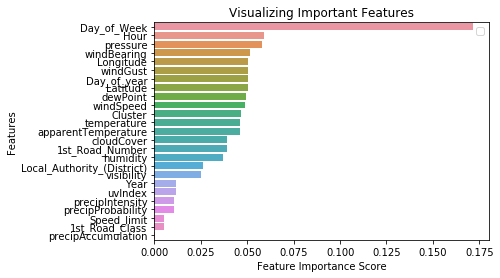

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()